# Import Libraries

In [151]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest

# Read The Data

In [2]:
credit_card_df = pd.read_csv("CC GENERAL.csv")
credit_card_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# Exploratory Data Analysis

In [3]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
credit_card_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

#### Checking and removing null values

In [5]:
credit_card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
credit_card_df.drop(['CUST_ID'], axis=1, inplace=True)

In [7]:
credit_card_df['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

In [10]:
credit_card_df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [11]:
credit_card_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Difference data Transformation Techniques

#### 1. MinMaxScaler
We use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data







In [27]:
min_max_scaler = MinMaxScaler()
credit_card_scaled_df = pd.DataFrame(min_max_scaler.fit_transform(credit_card_df),columns=credit_card_df.columns)
credit_card_scaled_df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8949.000000        8949.000000  8949.000000       8949.000000   
mean      0.082163           0.877350     0.020459          0.014536   
std       0.109309           0.236798     0.043572          0.040724   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.006741           0.888889     0.000812          0.000000   
50%       0.045879           1.000000     0.007371          0.000932   
75%       0.107880           1.000000     0.022638          0.014176   
max       1.000000           1.000000     1.000000          1.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean                 0.018272      0.020768             0.490405   
std                  0.040195      0.044493             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.003956      0.000000             0.500000   
75%                  0.020829      0.023630             0.916667   
max                  1.000000      1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.090094          0.026415       0.041094      0.148396   
std                  0.133422          0.055488       0.069437      0.121496   
min                  0.000000          0.000000       0.000000      0.000000   
25%                  0.000000          0.000000       0.002793      0.051753   
50%                  0.000000          0.000000       0.019553      0.098497   
75%                  0.148148          0.032520       0.047486      0.215359   
max                  1.000000          1.000000       1.000000      1.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8949.000000       8949.000000       8949.000000  8949.000000  
mean      0.034174          0.010916          0.153732     0.919656  
std       0.057080          0.030575          0.292511     0.222856  
min       0.000000          0.000000          0.000000     0.000000  
25%       0.007557          0.002134          0.000000     1.000000  
50%       0.016897          0.003791          0.000000     1.000000  
75%       0.037485          0.010323          0.142857     1.000000  
max       1.000000          1.000000          1.000000     1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27853a5d0>,
      dtype=object)

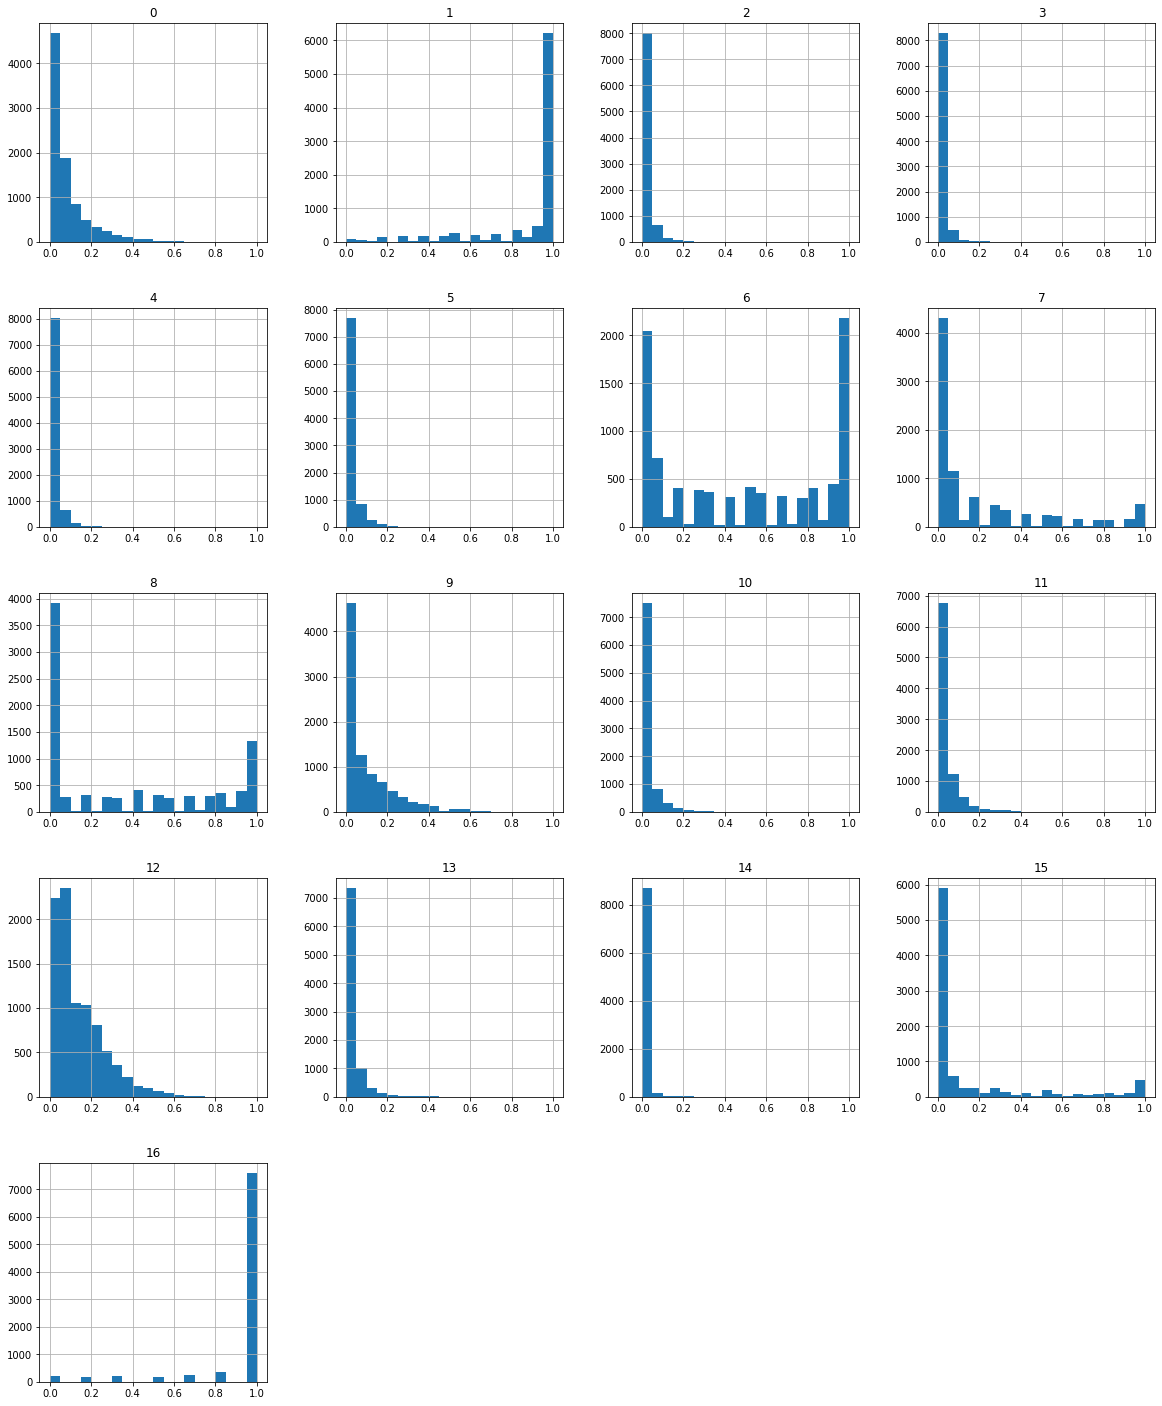

In [26]:
credit_card_scaled_df.hist(bins=20,figsize=(20,25))

#### 2. StandardScaler
They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero 

In [29]:
standard_scaler = StandardScaler()
credit_card_scaled_df = pd.DataFrame(standard_scaler.fit_transform(credit_card_df),columns=credit_card_df.columns)
credit_card_scaled_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8949.000000       8.949000e+03  8.949000e+03      8.949000e+03   
mean      0.000000      -3.144205e-16 -8.257509e-17     -4.128754e-17   
std       1.000056       1.000056e+00  1.000056e+00      1.000056e+00   
min      -0.751704      -3.705263e+00 -4.695839e-01     -3.569565e-01   
25%      -0.690033       4.873144e-02 -4.509562e-01     -3.569565e-01   
50%      -0.331962       5.179802e-01 -3.003952e-01     -3.340632e-01   
75%       0.235279       5.179802e-01  5.001060e-02     -8.840161e-03   
max       8.397195       5.179802e-01  2.248248e+01      2.419985e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.949000e+03  8.949000e+03         8.949000e+03   
mean             1.746781e-17 -1.587982e-17         7.701715e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -4.546069e-01 -4.668054e-01        -1.221928e+00   
25%             -4.546069e-01 -4.668054e-01        -1.014290e+00   
50%             -3.561912e-01 -4.668054e-01         2.390672e-02   
75%              6.362342e-02  6.432979e-02         1.062103e+00   
max              2.442576e+01  2.201002e+01         1.269742e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.949000e+03                      8.949000e+03   
mean                -6.351930e-18                      4.605149e-17   
std                  1.000056e+00                      1.000056e+00   
min                 -6.787162e-01                     -9.170895e-01   
25%                 -6.787162e-01                     -9.170895e-01   
50%                 -3.993831e-01                     -4.977267e-01   
75%                  3.268871e-01                      9.700395e-01   
max                  2.673295e+00                      1.599083e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.949000e+03      8.949000e+03   8.949000e+03  8.949000e+03   
mean            -1.270386e-17      1.587982e-17   1.905579e-17  2.159656e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -6.752945e-01     -4.760829e-01  -5.918405e-01 -1.221468e+00   
25%             -6.752945e-01     -4.760829e-01  -5.516107e-01 -7.954817e-01   
50%             -6.752945e-01     -4.760829e-01  -3.102316e-01 -4.107196e-01   
75%              4.351431e-01      1.100315e-01   9.206698e-02  5.511855e-01   
max              6.820167e+00      1.754694e+01   1.381045e+01  7.009692e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
count  8.949000e+03      8.949000e+03      8.949000e+03  8.949000e+03  
mean   6.351930e-17     -4.763947e-17     -3.175965e-18 -2.794849e-16  
std    1.000056e+00      1.000056e+00      1.000056e+00  1.000056e+00  
min   -5.987332e-01     -3.570567e-01     -5.255884e-01 -4.126919e+00  
25%   -4.663388e-01     -2.872659e-01     -5.255884e-01  3.605413e-01  
50%   -3.026846e-01     -2.330455e-01     -5.255884e-01  3.605413e-01  
75%    5.801121e-02     -1.941521e-02     -3.717957e-02  3.605413e-01  
max    1.692160e+01      3.235145e+01      2.893277e+00  3.605413e-01

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27782d4d0>,
      dtype=object)

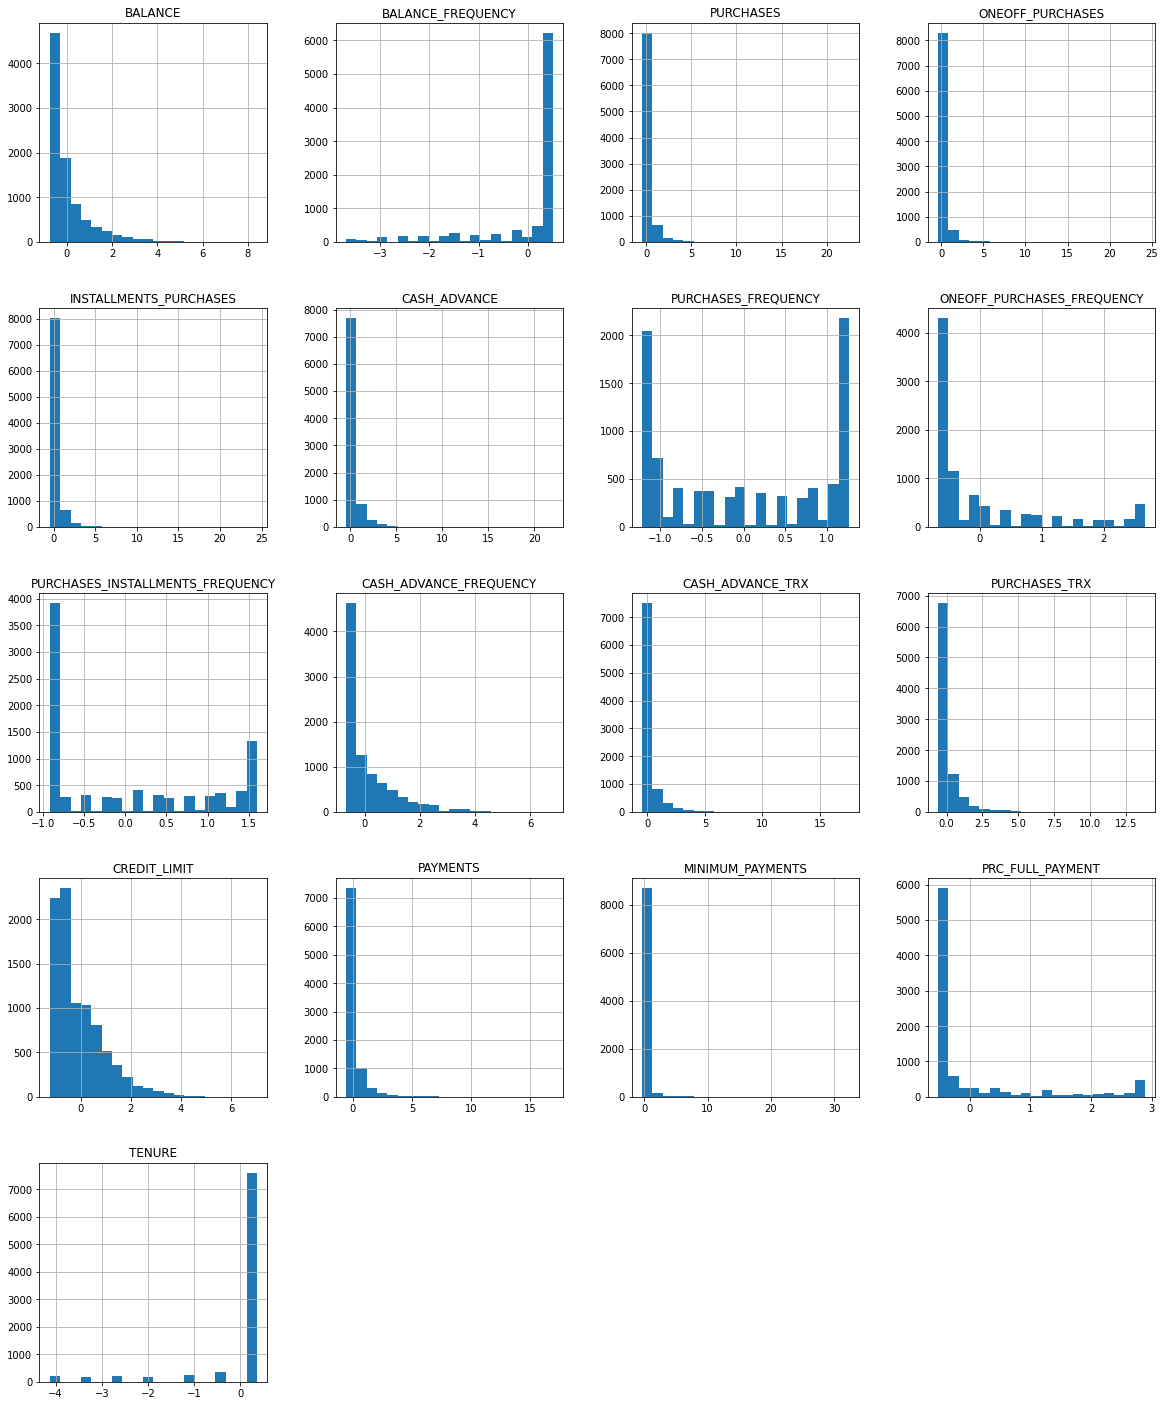

In [30]:
credit_card_scaled_df.hist(bins=20,figsize=(20,25))

#### 3. RobustScaler
we use this if the data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, we can use RobustScaler as a drop-in replacement instead, as It uses more robust estimates for the center and range of your data

In [31]:
robust_scaler = RobustScaler()
credit_card_scaled_df = pd.DataFrame(robust_scaler.fit_transform(credit_card_df),columns=credit_card_df.columns)
credit_card_scaled_df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8949.000000        8949.000000  8949.000000       8949.000000   
mean      0.358756          -1.103850     0.599631          0.959631   
std       1.080777           2.131185     1.996252          2.872763   
min      -0.453623          -9.000009    -0.337724         -0.065763   
25%      -0.386974          -1.000000    -0.300541         -0.065763   
50%       0.000000           0.000000     0.000000          0.000000   
75%       0.613026           0.000000     0.699459          0.934237   
max       9.433744           0.000000    45.477807         70.476178   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean                 0.687322      0.878882            -0.011514   
std                  1.929752      1.882865             0.481631   
min                 -0.189907      0.000000            -0.600000   
25%                 -0.189907      0.000000            -0.500000   
50%                  0.000000      0.000000             0.000000   
75%                  0.810093      1.000000             0.500000   
max                 47.820335     42.318465             0.600000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.397158                          0.263748   
std                      0.994484                          0.529935   
min                     -0.277777                         -0.222223   
25%                     -0.277777                         -0.222223   
50%                      0.000000                          0.000000   
75%                      0.722223                          0.777777   
max                      3.055557                          1.111111   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.608134          0.812270       0.481967      0.304990   
std                  0.900596          1.706247       1.553659      0.742615   
min                  0.000000          0.000000      -0.437500     -0.602041   
25%                  0.000000          0.000000      -0.375000     -0.285714   
50%                  0.000000          0.000000       0.000000      0.000000   
75%                  1.000000          1.000000       0.625000      0.714286   
max                  6.750007         30.750000      21.937500      5.510204   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8949.000000       8949.000000       8949.000000  8949.000000  
mean      0.577257          0.870058          1.076124    -0.482065  
std       1.907230          3.733632          2.047579     1.337134  
min      -0.564601         -0.462986          0.000000    -6.000000  
25%      -0.312109         -0.202428          0.000000     0.000000  
50%       0.000000          0.000000          0.000000     0.000000  
75%       0.687891          0.797572          1.000000     0.000000  
max      32.848838        121.651716          7.000007     0.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc276c87110>,
      dtype=object)

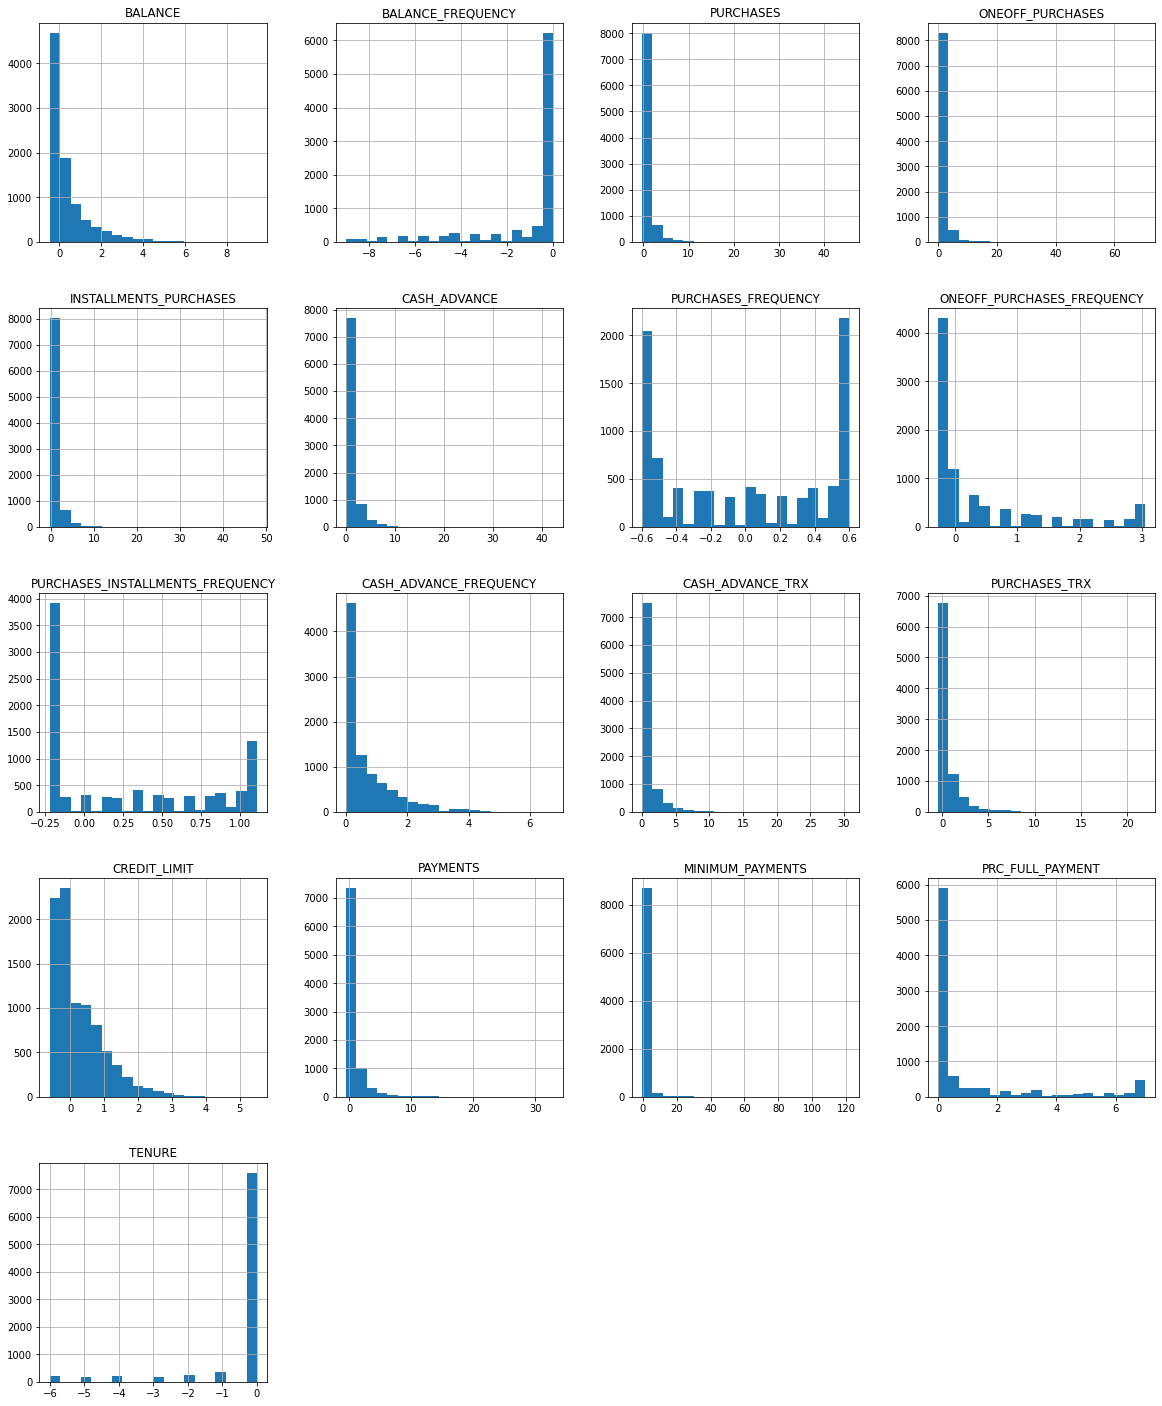

In [32]:
credit_card_scaled_df.hist(bins=20,figsize=(20,25))

#### 4. Normalizer
We use this if we plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples

In [33]:
normal_scaler = Normalizer()
credit_card_scaled_df = pd.DataFrame(normal_scaler.fit_transform(credit_card_df),columns=credit_card_df.columns)
credit_card_scaled_df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8949.000000        8949.000000  8949.000000       8949.000000   
mean      0.245577           0.000246     0.152716          0.078278   
std       0.218902           0.000216     0.164974          0.125241   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.033475           0.000100     0.008579          0.000000   
50%       0.203009           0.000176     0.095400          0.007001   
75%       0.430630           0.000331     0.249541          0.112359   
max       0.764287           0.002914     0.705477          0.637728   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean                 0.074529      0.138876             0.000132   
std                  0.109908      0.203191             0.000170   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000011   
50%                  0.017994      0.000000             0.000077   
75%                  0.113730      0.243925             0.000177   
max                  0.584346      0.812681             0.001375   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.000039                          0.000102   
std                      0.000068                          0.000161   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000008                          0.000031   
75%                      0.000054                          0.000134   
max                      0.000860                          0.001146   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.000030          0.000625       0.002818      0.744127   
std                  0.000057          0.001258       0.003660      0.202424   
min                  0.000000          0.000000       0.000000      0.005261   
25%                  0.000000          0.000000       0.000153      0.624737   
50%                  0.000000          0.000000       0.001581      0.753103   
75%                  0.000041          0.000772       0.004118      0.927470   
max                  0.000912          0.022498       0.063148      0.999998   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8949.000000       8949.000000       8949.000000  8949.000000  
mean      0.258010          0.128165          0.000044     0.003300  
std       0.198487          0.155268          0.000113     0.002780  
min       0.000000          0.000000          0.000000     0.000144  
25%       0.109551          0.035416          0.000000     0.001400  
50%       0.193033          0.082028          0.000000     0.002485  
75%       0.372967          0.156102          0.000030     0.004398  
max       0.978190          0.994341          0.002062     0.038470

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc276102fd0>,
      dtype=object)

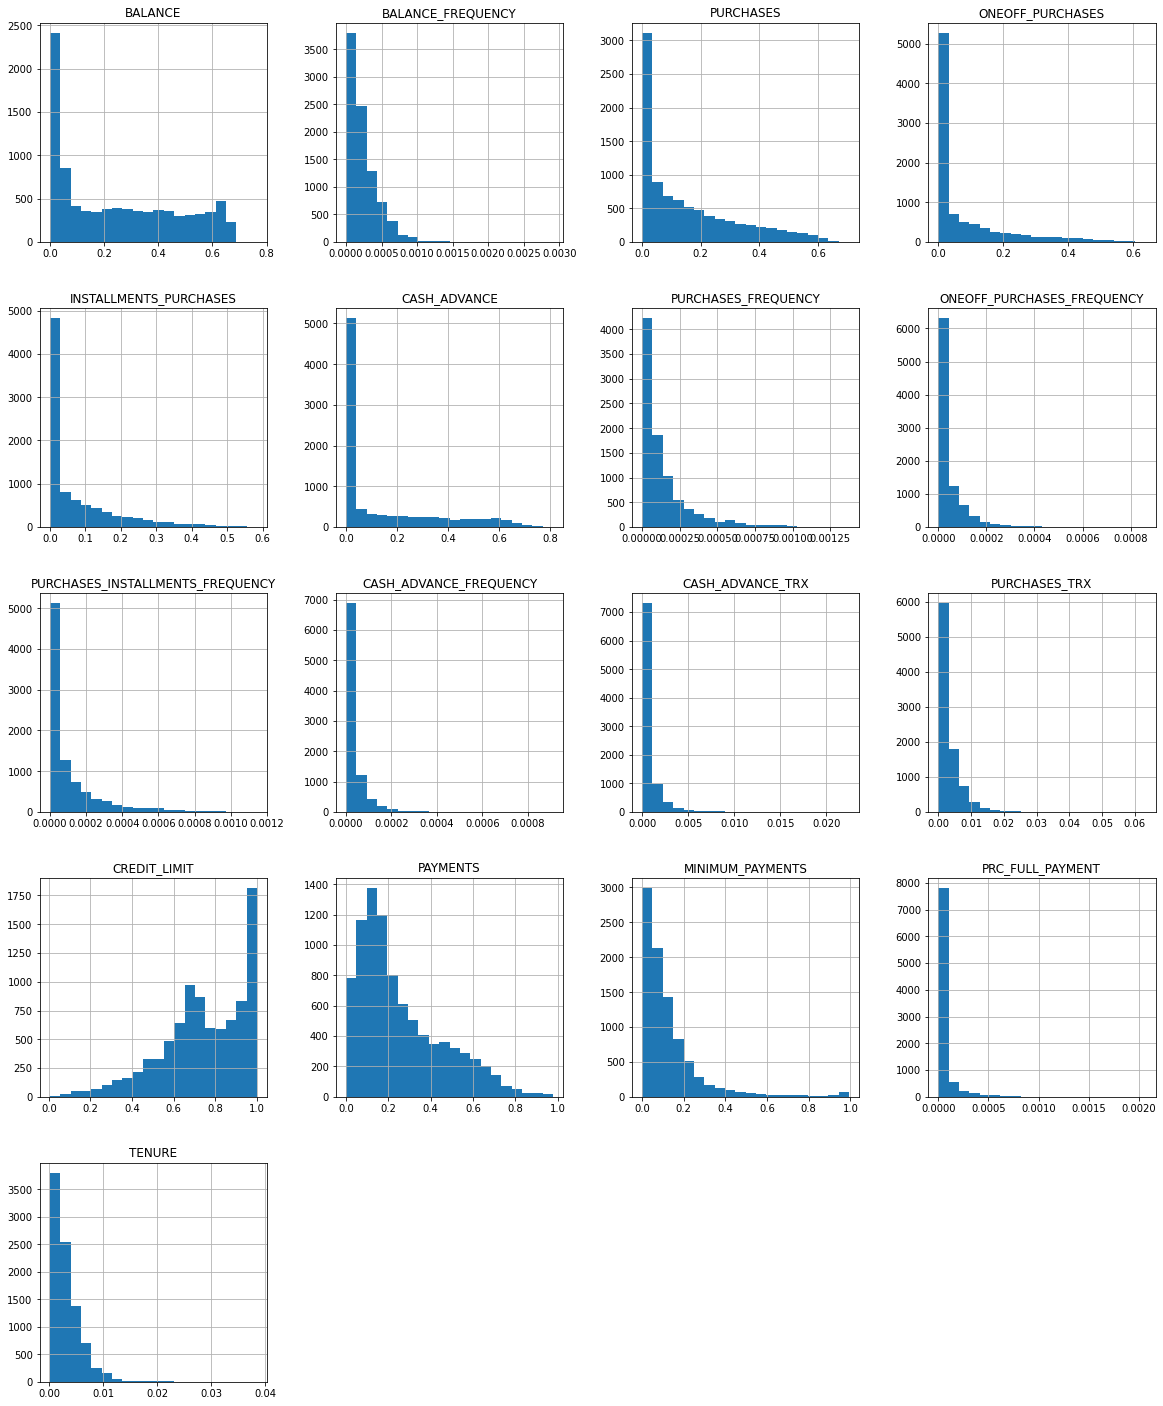

In [34]:
credit_card_scaled_df.hist(bins=20,figsize=(20,25))

#### 5. QuantileTransformer
we can use this to provide a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1

In [35]:
quantile_scaler = QuantileTransformer(output_distribution="normal")
credit_card_scaled_df = pd.DataFrame(quantile_scaler.fit_transform(credit_card_df),columns=credit_card_df.columns)
credit_card_scaled_df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8949.000000        8949.000000  8949.000000       8949.000000   
mean     -0.022261           3.235600    -0.884383         -2.100076   
std       1.084731           2.992096     2.436805          3.014191   
min      -5.199338          -5.199338    -5.199338         -5.199338   
25%      -0.674064          -0.672129    -0.674037         -5.199338   
50%       0.000396           5.199338    -0.000383         -0.000318   
75%       0.674457           5.199338     0.673920          0.674649   
max       5.199338           5.199338     5.199338          5.199338   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean                -1.880485     -2.290142             0.068124   
std                  2.965166      3.039314             3.581785   
min                 -5.199338     -5.199338            -5.199338   
25%                 -5.199338     -5.199338            -0.625670   
50%                 -0.000548     -5.199338             0.037646   
75%                  0.675221      0.674146             0.625670   
max                  5.199338      5.199338             5.199338   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                    -1.930338                         -1.338677   
std                      3.314992                          3.763424   
min                     -5.199338                         -5.199338   
25%                     -5.199338                         -5.199338   
50%                      0.106841                         -0.027604   
75%                      0.673702                          0.647177   
max                      5.199338                          5.199338   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                -2.290601         -2.289747      -0.884402      0.002791   
std                  3.038570          3.040162       2.436618      0.995873   
min                 -5.199338         -5.199338      -5.199338     -5.199338   
25%                 -5.199338         -5.199338      -0.625670     -0.667419   
50%                 -5.199338         -5.199338      -0.008782     -0.079120   
75%                  0.675277          0.692715       0.672129      0.707140   
max                  5.199338          5.199338       5.199338      5.199338   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8949.000000       8949.000000       8949.000000  8949.000000  
mean     -0.077364         -0.104542         -2.889389     4.106608  
std       1.254563          1.327020          3.348906     2.631049  
min      -5.199338         -5.199338         -5.199338    -5.199338  
25%      -0.674223         -0.675645         -5.199338     5.199338  
50%       0.000117         -0.000551         -5.199338     5.199338  
75%       0.674364          0.674440          0.675277     5.199338  
max       5.199338          5.199338          5.199338     5.199338

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27676d650>,
      dtype=object)

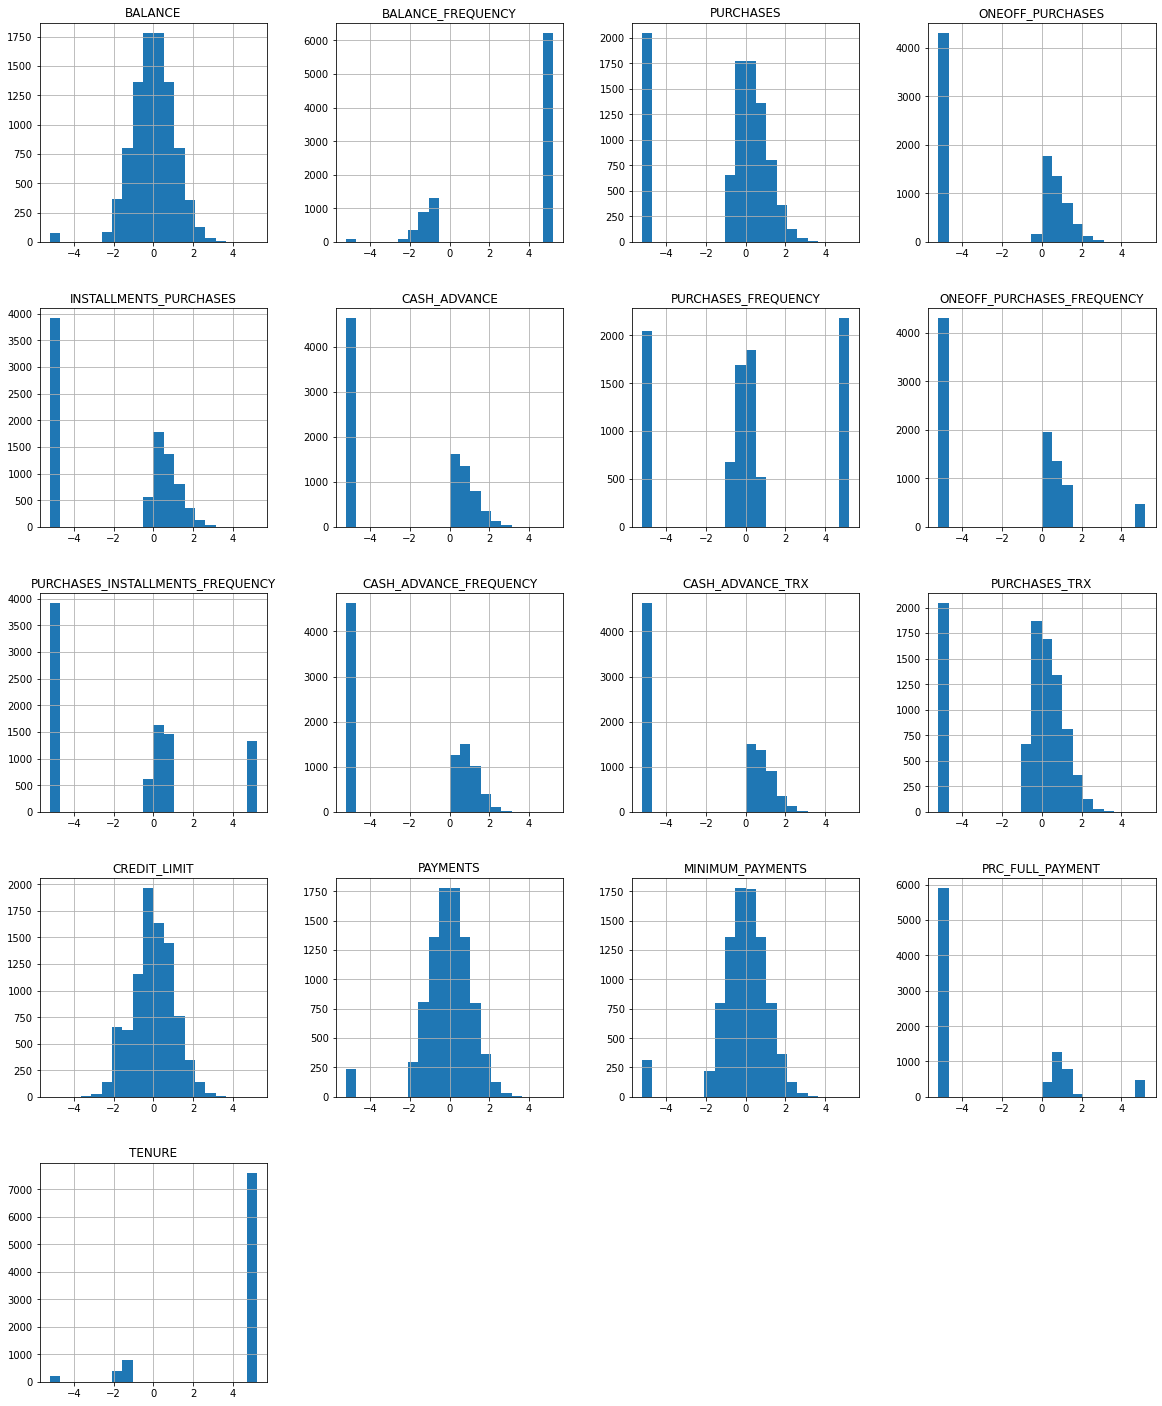

In [36]:
credit_card_scaled_df.hist(bins=20,figsize=(20,25))

#### 6. PowerTransformer
We use this to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness

In [37]:
power_scaler = PowerTransformer()
credit_card_scaled_df = pd.DataFrame(power_scaler.fit_transform(credit_card_df),columns=credit_card_df.columns)
credit_card_scaled_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.949000e+03       8.949000e+03  8.949000e+03      8.949000e+03   
mean   3.175965e-17      -2.985407e-16  2.572532e-16     -4.446351e-17   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -2.120398e+00      -1.997887e+00 -1.505361e+00     -1.000587e+00   
25%   -8.167874e-01      -5.997311e-01 -6.538189e-01     -1.000587e+00   
50%    1.516842e-01       6.285273e-01  1.608133e-01      2.372950e-01   
75%    7.178628e-01       6.285273e-01  7.101365e-01      9.910054e-01   
max    2.731527e+00       6.285273e-01  3.559725e+00      1.959353e+00   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.949000e+03  8.949000e+03         8.949000e+03   
mean             5.954934e-18 -1.603862e-16         7.106221e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -1.085536e+00 -9.444427e-01        -1.278999e+00   
25%             -1.085536e+00 -9.444427e-01        -1.016108e+00   
50%              3.609802e-01 -9.444427e-01         1.194252e-01   
75%              9.059779e-01  1.059111e+00         1.050193e+00   
max              2.212357e+00  1.729736e+00         1.218811e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.949000e+03                      8.949000e+03   
mean                 3.175965e-17                      2.223175e-17   
std                  1.000056e+00                      1.000056e+00   
min                 -9.033884e-01                     -1.004536e+00   
25%                 -9.033884e-01                     -1.004536e+00   
50%                 -9.237935e-02                     -2.740363e-01   
75%                  9.779170e-01                      1.069759e+00   
max                  1.732520e+00                      1.377088e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.949000e+03      8.949000e+03   8.949000e+03  8.949000e+03   
mean            -6.351930e-18     -1.052038e-16   1.270386e-16 -3.430042e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -8.831117e-01     -9.057298e-01  -1.387809e+00 -4.572732e+00   
25%             -8.831117e-01     -9.057298e-01  -8.729283e-01 -8.805581e-01   
50%             -8.831117e-01     -9.057298e-01   1.430651e-01 -1.296753e-01   
75%              1.017007e+00      1.044306e+00   7.289786e-01  8.300226e-01   
max              1.902604e+00      1.921183e+00   2.838933e+00  2.851692e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
count  8.949000e+03      8.949000e+03      8.949000e+03  8.949000e+03  
mean  -2.032618e-16     -3.303003e-16      1.969098e-16  5.335621e-16  
std    1.000056e+00      1.000056e+00      1.000056e+00  1.000056e+00  
min   -2.783284e+00     -2.732257e+00     -6.779366e-01 -2.527192e+00  
25%   -6.092456e-01     -5.115282e-01     -6.779366e-01  4.221075e-01  
50%   -6.436984e-02     -1.442519e-01     -6.779366e-01  4.221075e-01  
75%    5.694160e-01      5.749149e-01      8.539374e-01  4.221075e-01  
max    4.568730e+00      5.583936e+00      1.873568e+00  4.221075e-01

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc274990350>,
      dtype=object)

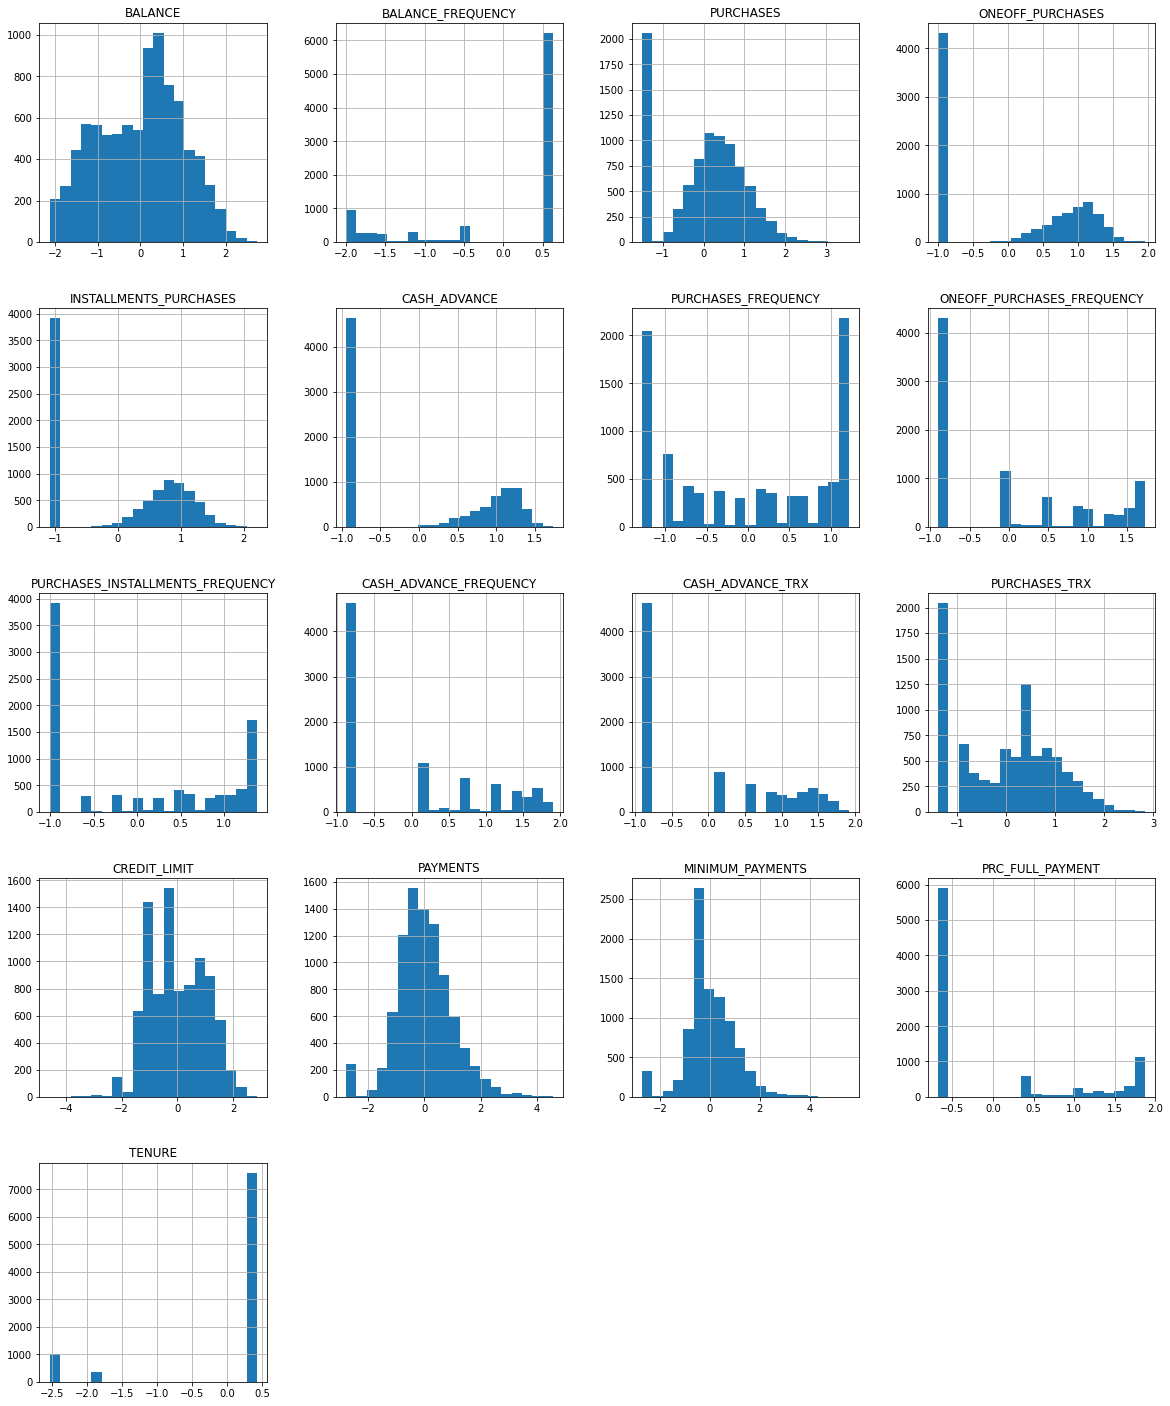

In [38]:
credit_card_scaled_df.hist(bins=20,figsize=(20,25))

# Dimensionality Reduction

## 1. Using PCA and Kernel PCA


1.1.   Normal PCA



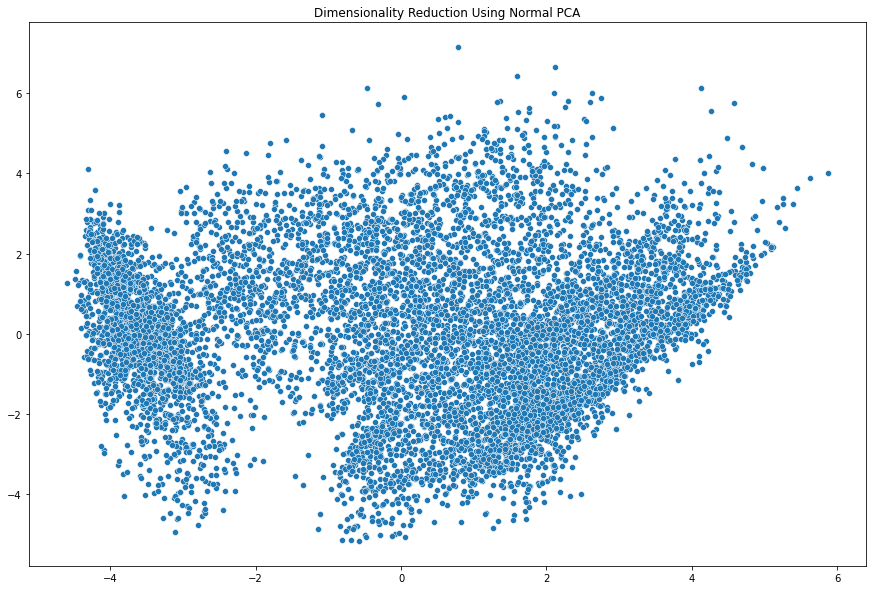

In [45]:
normal_pca = PCA(5)
normal_transform_pca = normal_pca.fit_transform(credit_card_scaled_df)
normal_pca_df = pd.DataFrame(normal_transform_pca,index=credit_card_scaled_df.index)
fig,ax=plt.subplots(figsize=(15, 10))
sns.scatterplot(x=normal_transform_pca[:, 0], y=normal_transform_pca[:, 1], ax=ax)
plt.title("Dimensionality Reduction Using Normal PCA")
plt.show()

1.2.   Kernel PCA



> 1.2.1.   linear Kernel











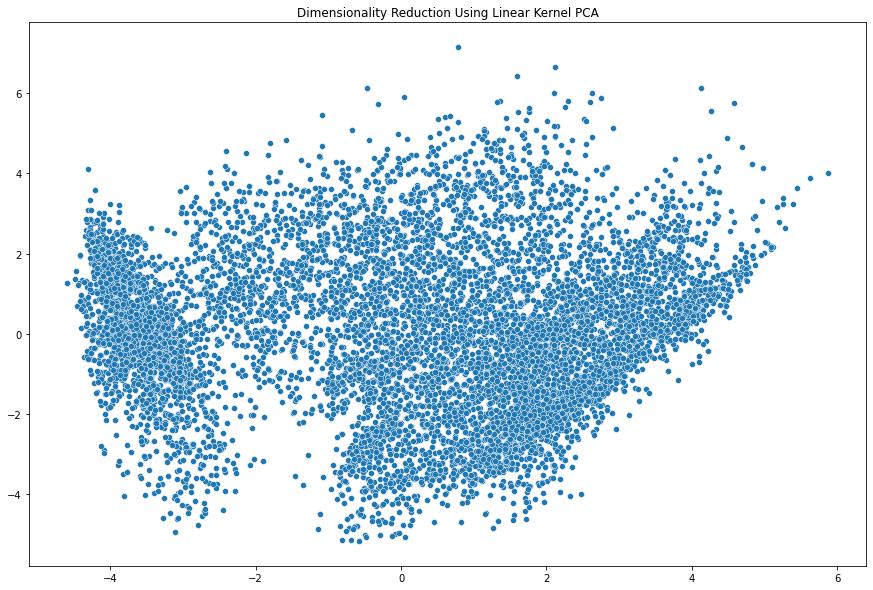

In [46]:
kernel_linear_pca = KernelPCA(5,kernel='linear')
kernel_linear_transform_pca = kernel_linear_pca.fit_transform(credit_card_scaled_df)
kernel_linear_pca_df = pd.DataFrame(kernel_linear_transform_pca,index=credit_card_scaled_df.index)
fig,ax=plt.subplots(figsize=(15, 10))
sns.scatterplot(x=kernel_linear_transform_pca[:, 0], y=kernel_linear_transform_pca[:, 1], ax=ax)
plt.title("Dimensionality Reduction Using Linear Kernel PCA")
plt.show()



> 1.2.2.   Polynomial Kernel





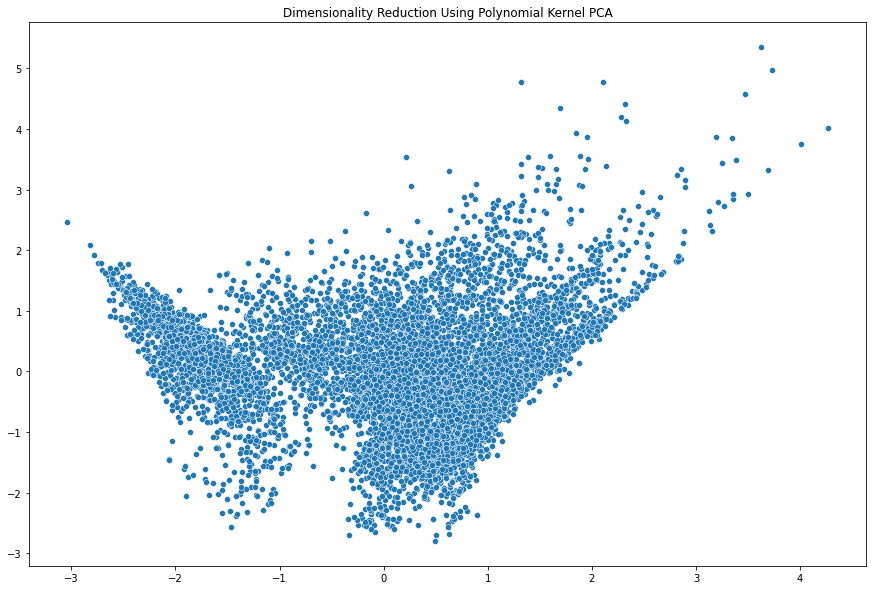

In [49]:
kernel_poly_pca = KernelPCA(5,kernel='poly')
kernel_poly_transform_pca = kernel_poly_pca.fit_transform(credit_card_scaled_df)
kernel_poly_pca_df = pd.DataFrame(kernel_poly_transform_pca,index=credit_card_scaled_df.index)
fig,ax=plt.subplots(figsize=(15, 10))
sns.scatterplot(x=kernel_poly_transform_pca[:, 0], y=kernel_poly_transform_pca[:, 1], ax=ax)
plt.title("Dimensionality Reduction Using Polynomial Kernel PCA")
plt.show()

> 1.2.3.   rbf Kernel

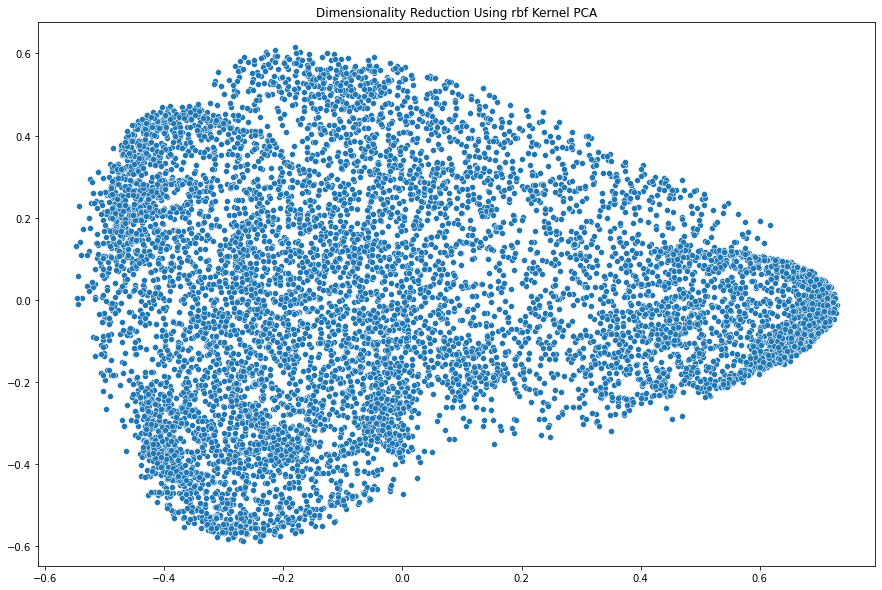

In [48]:
kernel_rbf_pca = KernelPCA(5,kernel='rbf')
kernel_rbf_transform_pca = kernel_rbf_pca.fit_transform(credit_card_scaled_df)
kernel_rbf_pca_df = pd.DataFrame(kernel_rbf_transform_pca,index=credit_card_scaled_df.index)
fig,ax=plt.subplots(figsize=(15, 10))
sns.scatterplot(x=kernel_rbf_transform_pca[:, 0], y=kernel_rbf_transform_pca[:, 1], ax=ax)
plt.title("Dimensionality Reduction Using rbf Kernel PCA")
plt.show()

---
> rbf Kernel PCA is better than Normal PCA
---




## 2. Using T-SNE


2.1.   For dataset before PCA




In [54]:
tsne_model = TSNE(n_components=2, perplexity=30, learning_rate=1, init='pca', method='barnes_hut', n_jobs=-1, n_iter=10**3, random_state=42).fit_transform(credit_card_scaled_df)
tsne_df = pd.DataFrame(tsne_model, index=credit_card_scaled_df.index)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


2.2.   For dataset After Normal PCA




In [55]:
tsne_pca_model = TSNE(n_components=2, perplexity=30, learning_rate=1, init='pca', method='barnes_hut', n_jobs=-1, n_iter=10**3, random_state=42).fit_transform(normal_pca_df)
tsne_pca_df = pd.DataFrame(tsne_pca_model, index=normal_pca_df.index)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


2.3. For dataset After rbf Kernel PCA

In [56]:
tsne_kernel_rbf_model = TSNE(n_components=2, perplexity=30, learning_rate=1, init='pca', method='barnes_hut', n_jobs=-1, n_iter=10**3, random_state=42).fit_transform(kernel_rbf_pca_df)
tsne_kernel_rbf_df = pd.DataFrame(tsne_kernel_rbf_model, index=kernel_rbf_pca_df.index)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


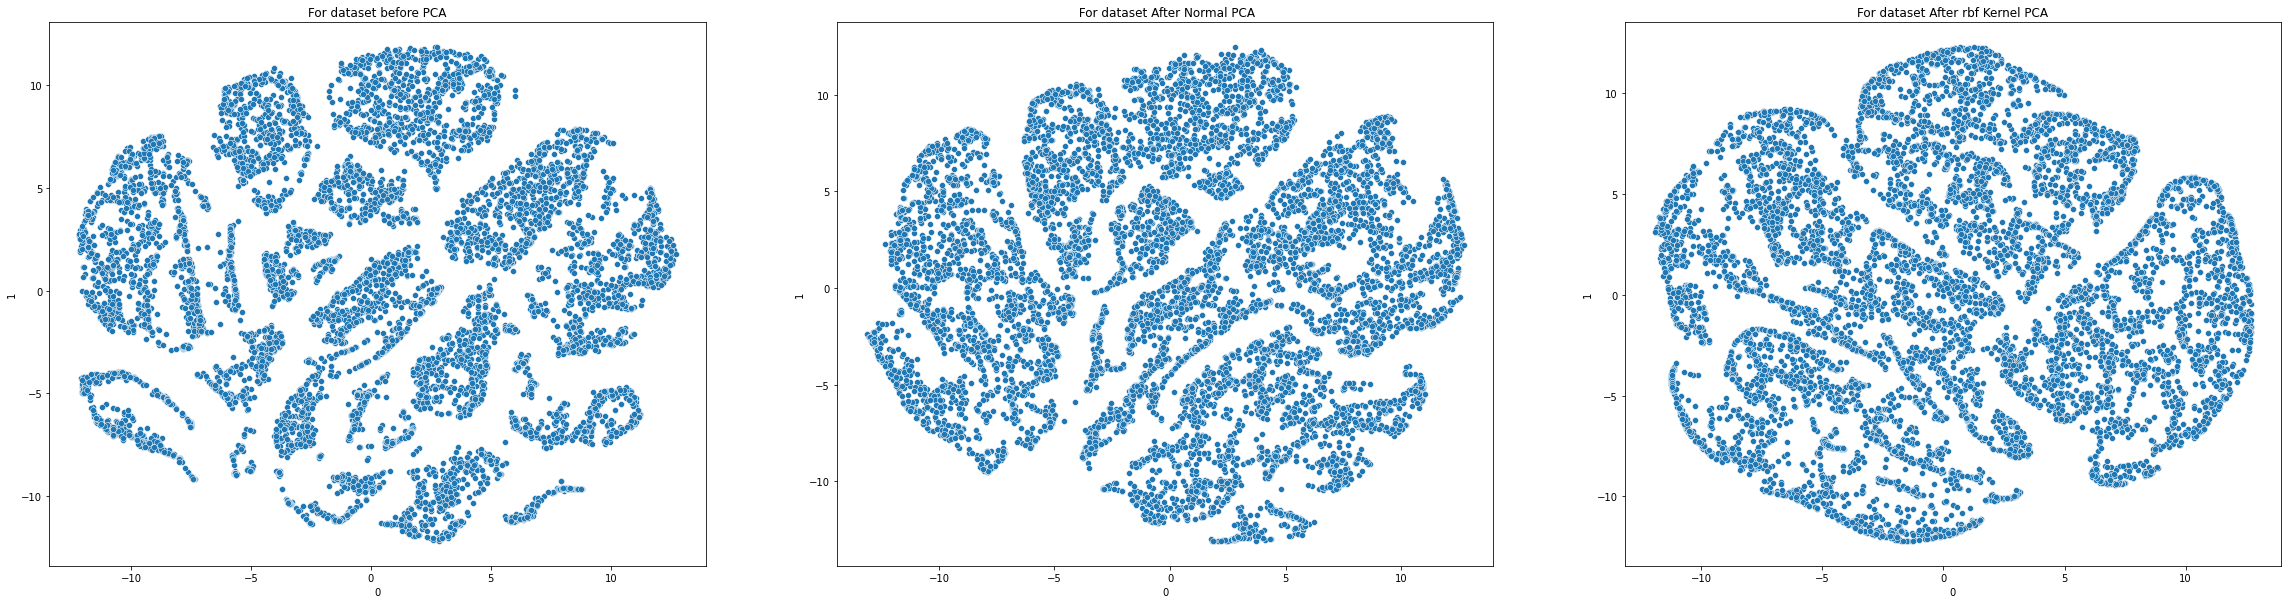

In [62]:
fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],ax=axs[0],legend='full').set(title='For dataset before PCA')
sns.scatterplot(x=tsne_pca_df[0], y=tsne_pca_df[1],ax=axs[1],legend='full').set(title=' For dataset After Normal PCA')
sns.scatterplot(x=tsne_kernel_rbf_df[0], y=tsne_kernel_rbf_df[1],ax=axs[2],legend='full').set(title='For dataset After rbf Kernel PCA')

# Data Modeling
1. KMeans Clustering

>>The Elbow Method using Distortion to find the best number of clusters

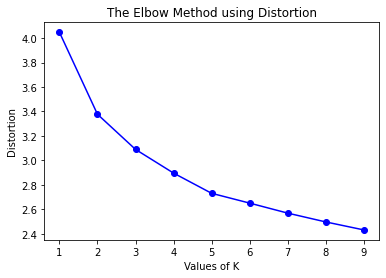

The best number of clusters 2


In [67]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(credit_card_scaled_df)
    kmeanModel.fit(credit_card_scaled_df)
    distortions.append(sum(np.min(cdist(credit_card_scaled_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / credit_card_scaled_df.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(credit_card_scaled_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / credit_card_scaled_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

num_clusters=[i for i in range(1, 10)]
indx=np.array([np.nan])
indx=np.append(indx,[abs(distortions[i+1]-distortions[i]) for i in range(len(distortions)-1)])
index_best=indx[1:].argmax()
print('The best number of clusters',num_clusters[index_best+1])

>>1.1. Using dataset before PCA

In [70]:
kmeans_model = KMeans(n_clusters=2, random_state=42).fit(credit_card_scaled_df)
tsne_kmeans_df = pd.DataFrame(credit_card_scaled_df,index=credit_card_scaled_df.index)
tsne_kmeans_df['KMeans_labels'] = kmeans_model.labels_
print('KMeans silhouette_score ', metrics.silhouette_score(credit_card_scaled_df, tsne_kmeans_df['KMeans_labels'], metric='euclidean'))
print('KMeans calinski_harabasz_score ', metrics.calinski_harabasz_score(credit_card_scaled_df, tsne_kmeans_df['KMeans_labels']))
print('KMeans davies_bouldin_score ', metrics.davies_bouldin_score(credit_card_scaled_df, tsne_kmeans_df['KMeans_labels']))

KMeans silhouette_score  0.2713913614921847
KMeans calinski_harabasz_score  3515.2824698167537
KMeans davies_bouldin_score  1.4327073340984435


---
1. ***Silhouette Score:*** It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.
> Scores around zero indicate overlapping clusters, the score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

2. ***Calinski-Harabasz Score:*** It is known as the Variance Ratio Criterion,  and it is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.
> The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster, the score is fast to compute.

3. ***Davies-Bouldin Score:*** The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances, Thus, clusters which are farther apart and less dispersed will result in a better score.
>The minimum score is zero, with lower values indicating better clustering.
---

>>1.2. Using dataset after Normal PCA

In [71]:
kmeans_pca_model = KMeans(n_clusters=2, random_state=42).fit(normal_pca_df)
tsne_kmeans_pca_df = pd.DataFrame(normal_pca_df,index=normal_pca_df.index)
tsne_kmeans_pca_df['KMeans_labels'] = kmeans_pca_model.labels_
print('KMeans silhouette_score ', metrics.silhouette_score(normal_pca_df, tsne_kmeans_pca_df['KMeans_labels'], metric='euclidean'))
print('KMeans calinski_harabasz_score ', metrics.calinski_harabasz_score(normal_pca_df, tsne_kmeans_pca_df['KMeans_labels']))
print('KMeans davies_bouldin_score ', metrics.davies_bouldin_score(normal_pca_df, tsne_kmeans_pca_df['KMeans_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KMeans silhouette_score  0.3258243915598752
KMeans calinski_harabasz_score  4615.200203793024
KMeans davies_bouldin_score  1.2292666868514803


>>1.3. Using dataset after Kernel rbf PCA

In [72]:
kmeans_kernel_rbf_pca_model = KMeans(n_clusters=2, random_state=42).fit(kernel_rbf_pca_df)
tsne_kmeans_kernel_rbf_pca_df = pd.DataFrame(kernel_rbf_pca_df,index=kernel_rbf_pca_df.index)
tsne_kmeans_kernel_rbf_pca_df['KMeans_labels'] = kmeans_kernel_rbf_pca_model.labels_
print('KMeans silhouette_score ', metrics.silhouette_score(kernel_rbf_pca_df, tsne_kmeans_kernel_rbf_pca_df['KMeans_labels'], metric='euclidean'))
print('KMeans calinski_harabasz_score ', metrics.calinski_harabasz_score(kernel_rbf_pca_df, tsne_kmeans_kernel_rbf_pca_df['KMeans_labels']))
print('KMeans davies_bouldin_score ', metrics.davies_bouldin_score(kernel_rbf_pca_df, tsne_kmeans_kernel_rbf_pca_df['KMeans_labels']))

KMeans silhouette_score  0.5393430973703685
KMeans calinski_harabasz_score  11901.999277409059
KMeans davies_bouldin_score  0.6730477574079089


>>1.4. T-SNE For KMeans Clustering

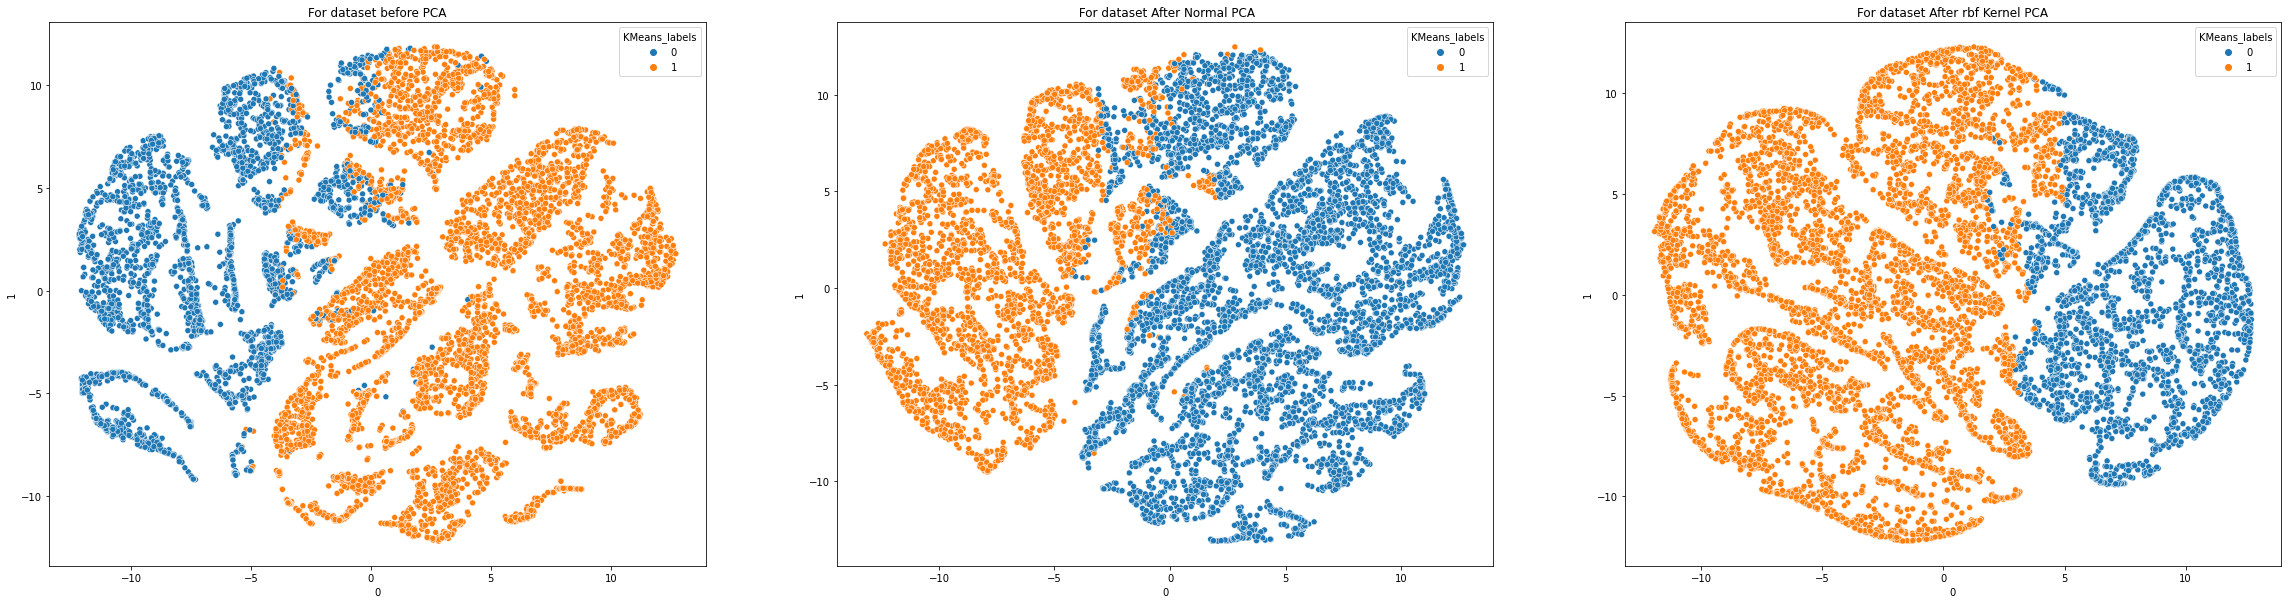

In [73]:
tsne_df['KMeans_labels'] = tsne_kmeans_df['KMeans_labels']
tsne_pca_df['KMeans_labels'] = tsne_kmeans_pca_df['KMeans_labels']
tsne_kernel_rbf_df['KMeans_labels'] = tsne_kmeans_kernel_rbf_pca_df['KMeans_labels']

fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],hue=tsne_df['KMeans_labels'],ax=axs[0],palette=sns.color_palette("crest", as_cmap=True),legend='full').set(title='For dataset before PCA')
sns.scatterplot(x=tsne_pca_df[0], y=tsne_pca_df[1],hue=tsne_pca_df['KMeans_labels'],palette=sns.color_palette("crest", as_cmap=True),ax=axs[1],legend='full').set(title=' For dataset After Normal PCA')
sns.scatterplot(x=tsne_kernel_rbf_df[0], y=tsne_kernel_rbf_df[1],hue=tsne_kernel_rbf_df['KMeans_labels'],palette=sns.color_palette("crest", as_cmap=True),ax=axs[2],legend='full').set(title='For dataset After rbf Kernel PCA')

2. Hierarchical Clustering

>>2.1. Using dataset before PCA

In [150]:
Agglomerative_clustering_model = AgglomerativeClustering(n_clusters=6, linkage="complete").fit(credit_card_scaled_df)
tsne_agg_df = pd.DataFrame(credit_card_scaled_df,index=credit_card_scaled_df.index)
tsne_agg_df['Agglomerative_labels'] = Agglomerative_clustering_model.labels_
print('Hierarchical Clustering silhouette_score ', metrics.silhouette_score(credit_card_scaled_df, tsne_agg_df['Agglomerative_labels'], metric='euclidean'))
print('Hierarchical Clustering calinski_harabasz_score ', metrics.calinski_harabasz_score(credit_card_scaled_df, tsne_agg_df['Agglomerative_labels']))
print('Hierarchical Clustering davies_bouldin_score ', metrics.davies_bouldin_score(credit_card_scaled_df, tsne_agg_df['Agglomerative_labels']))

Hierarchical Clustering silhouette_score  0.15180948426349666
Hierarchical Clustering calinski_harabasz_score  1598.7494154571418
Hierarchical Clustering davies_bouldin_score  1.8591913508732512


>>2.2. Using dataset After Normal PCA

In [149]:
Agglomerative_clustering_pca_model = AgglomerativeClustering(n_clusters=6, linkage="complete").fit(normal_pca_df)
tsne_agg_pca_df = pd.DataFrame(normal_pca_df,index=normal_pca_df.index)
tsne_agg_pca_df['Agglomerative_labels'] = Agglomerative_clustering_pca_model.labels_
print('Hierarchical Clustering silhouette_score ', metrics.silhouette_score(normal_pca_df, tsne_agg_pca_df['Agglomerative_labels'], metric='euclidean'))
print('Hierarchical Clustering calinski_harabasz_score ', metrics.calinski_harabasz_score(normal_pca_df, tsne_agg_pca_df['Agglomerative_labels']))
print('Hierarchical Clustering davies_bouldin_score ', metrics.davies_bouldin_score(normal_pca_df, tsne_agg_pca_df['Agglomerative_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Hierarchical Clustering silhouette_score  0.26691209836246144
Hierarchical Clustering calinski_harabasz_score  2762.800615598518
Hierarchical Clustering davies_bouldin_score  1.4080900345736094


>>2.3. Using dataset After Kernel rbf PCA

In [148]:
Agglomerative_clustering_kernel_model = AgglomerativeClustering(n_clusters=6, linkage="complete").fit(kernel_rbf_pca_df)
tsne_agg_kernel_df = pd.DataFrame(kernel_rbf_pca_df,index=kernel_rbf_pca_df.index)
tsne_agg_kernel_df['Agglomerative_labels'] = Agglomerative_clustering_kernel_model.labels_
print('Hierarchical Clustering silhouette_score ', metrics.silhouette_score(kernel_rbf_pca_df, tsne_agg_kernel_df['Agglomerative_labels'], metric='euclidean'))
print('Hierarchical Clustering calinski_harabasz_score ', metrics.calinski_harabasz_score(kernel_rbf_pca_df, tsne_agg_kernel_df['Agglomerative_labels']))
print('Hierarchical Clustering davies_bouldin_score ', metrics.davies_bouldin_score(kernel_rbf_pca_df, tsne_agg_kernel_df['Agglomerative_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Hierarchical Clustering silhouette_score  0.7161035162505504
Hierarchical Clustering calinski_harabasz_score  55744.33779691599
Hierarchical Clustering davies_bouldin_score  0.4412103357940497


>> 2.4. T-SNE For Hierarchical Clustering

[Text(0.5, 1.0, 'For dataset After rbf Kernel PCA')]

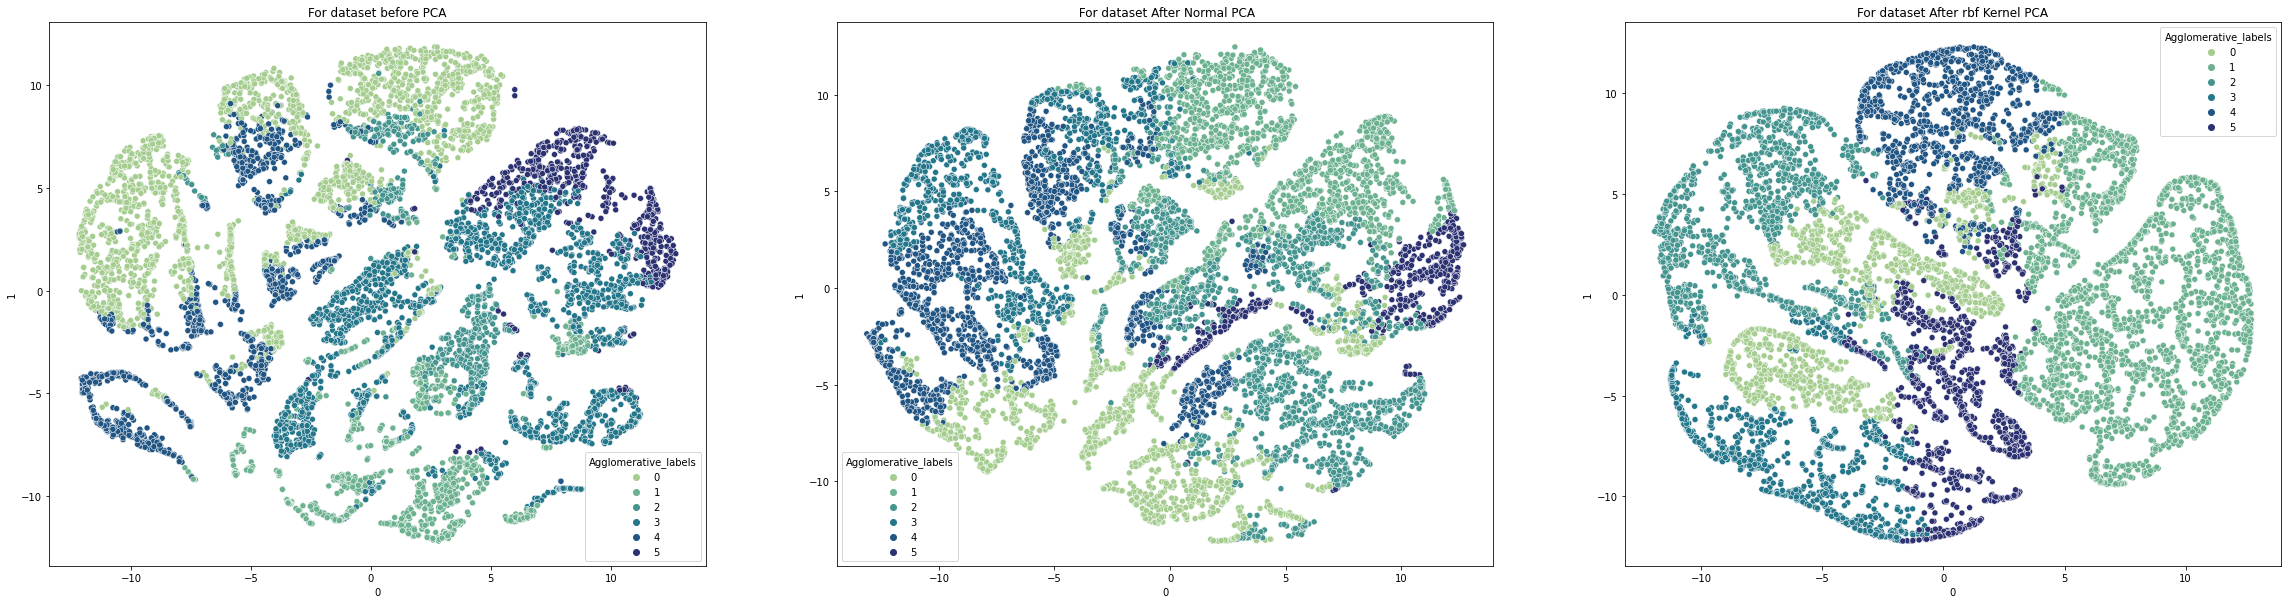

In [93]:
tsne_df['Agglomerative_labels'] = tsne_agg_df['Agglomerative_labels']
tsne_pca_df['Agglomerative_labels'] = tsne_agg_pca_df['Agglomerative_labels']
tsne_kernel_rbf_df['Agglomerative_labels'] = tsne_agg_kernel_df['Agglomerative_labels']

fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],hue=tsne_df['Agglomerative_labels'],ax=axs[0],palette=sns.color_palette("crest", as_cmap=True),legend='full').set(title='For dataset before PCA')
sns.scatterplot(x=tsne_pca_df[0], y=tsne_pca_df[1],hue=tsne_pca_df['Agglomerative_labels'],ax=axs[1],palette=sns.color_palette("crest", as_cmap=True),legend='full').set(title=' For dataset After Normal PCA')
sns.scatterplot(x=tsne_kernel_rbf_df[0], y=tsne_kernel_rbf_df[1],hue=tsne_kernel_rbf_df['Agglomerative_labels'],ax=axs[2],palette=sns.color_palette("crest", as_cmap=True),legend='full').set(title='For dataset After rbf Kernel PCA')


### Modeling for Anomaly Detection Algorithm

3. EM Algorithm

>>3.1. Using dataset before PCA

In [147]:
GaussianMixture_model = GaussianMixture(n_components=2, random_state=0).fit(credit_card_scaled_df)
tsne_em_df = pd.DataFrame(credit_card_scaled_df,index=credit_card_scaled_df.index)
tsne_em_df['GaussianMixture_labels'] = GaussianMixture_model.predict(credit_card_scaled_df)
print('GaussianMixture silhouette_score ', metrics.silhouette_score(credit_card_scaled_df, tsne_em_df['GaussianMixture_labels'], metric='euclidean'))
print('GaussianMixture calinski_harabasz_score ', metrics.calinski_harabasz_score(credit_card_scaled_df, tsne_em_df['GaussianMixture_labels']))
print('GaussianMixture davies_bouldin_score ', metrics.davies_bouldin_score(credit_card_scaled_df, tsne_em_df['GaussianMixture_labels']))

GaussianMixture silhouette_score  0.25128094971404835
GaussianMixture calinski_harabasz_score  3038.3623056876713
GaussianMixture davies_bouldin_score  1.5836652871243448


>>3.2. Using dataset After Normal PCA

In [146]:
GaussianMixture_pca_model = GaussianMixture(n_components=2, random_state=0).fit(normal_pca_df)
tsne_em_pca_df = pd.DataFrame(normal_pca_df,index=normal_pca_df.index)
tsne_em_pca_df['GaussianMixture_labels'] = GaussianMixture_pca_model.predict(normal_pca_df)
print('GaussianMixture silhouette_score ', metrics.silhouette_score(normal_pca_df, tsne_em_pca_df['GaussianMixture_labels'], metric='euclidean'))
print('GaussianMixture calinski_harabasz_score ', metrics.calinski_harabasz_score(normal_pca_df, tsne_em_pca_df['GaussianMixture_labels']))
print('GaussianMixture davies_bouldin_score ', metrics.davies_bouldin_score(normal_pca_df, tsne_em_pca_df['GaussianMixture_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


GaussianMixture silhouette_score  0.3067981313947798
GaussianMixture calinski_harabasz_score  4070.12116136712
GaussianMixture davies_bouldin_score  1.3206137999710417


>>3.3. Using dataset After Kernel rbf PCA

In [145]:
GaussianMixture_kernel_model = GaussianMixture(n_components=2, random_state=0).fit(kernel_rbf_pca_df)
tsne_em_kernel_df = pd.DataFrame(kernel_rbf_pca_df,index=kernel_rbf_pca_df.index)
tsne_em_kernel_df['GaussianMixture_labels'] = GaussianMixture_kernel_model.predict(kernel_rbf_pca_df)
print('GaussianMixture silhouette_score ', metrics.silhouette_score(kernel_rbf_pca_df, tsne_em_kernel_df['GaussianMixture_labels'], metric='euclidean'))
print('GaussianMixture calinski_harabasz_score ', metrics.calinski_harabasz_score(kernel_rbf_pca_df, tsne_em_kernel_df['GaussianMixture_labels']))
print('GaussianMixture davies_bouldin_score ', metrics.davies_bouldin_score(kernel_rbf_pca_df, tsne_em_kernel_df['GaussianMixture_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


GaussianMixture silhouette_score  0.5685610468929154
GaussianMixture calinski_harabasz_score  16406.148960038463
GaussianMixture davies_bouldin_score  0.6738067196637006


>> 3.4. T-SNE For EM Algorithm

[Text(0.5, 1.0, 'For dataset After rbf Kernel PCA')]

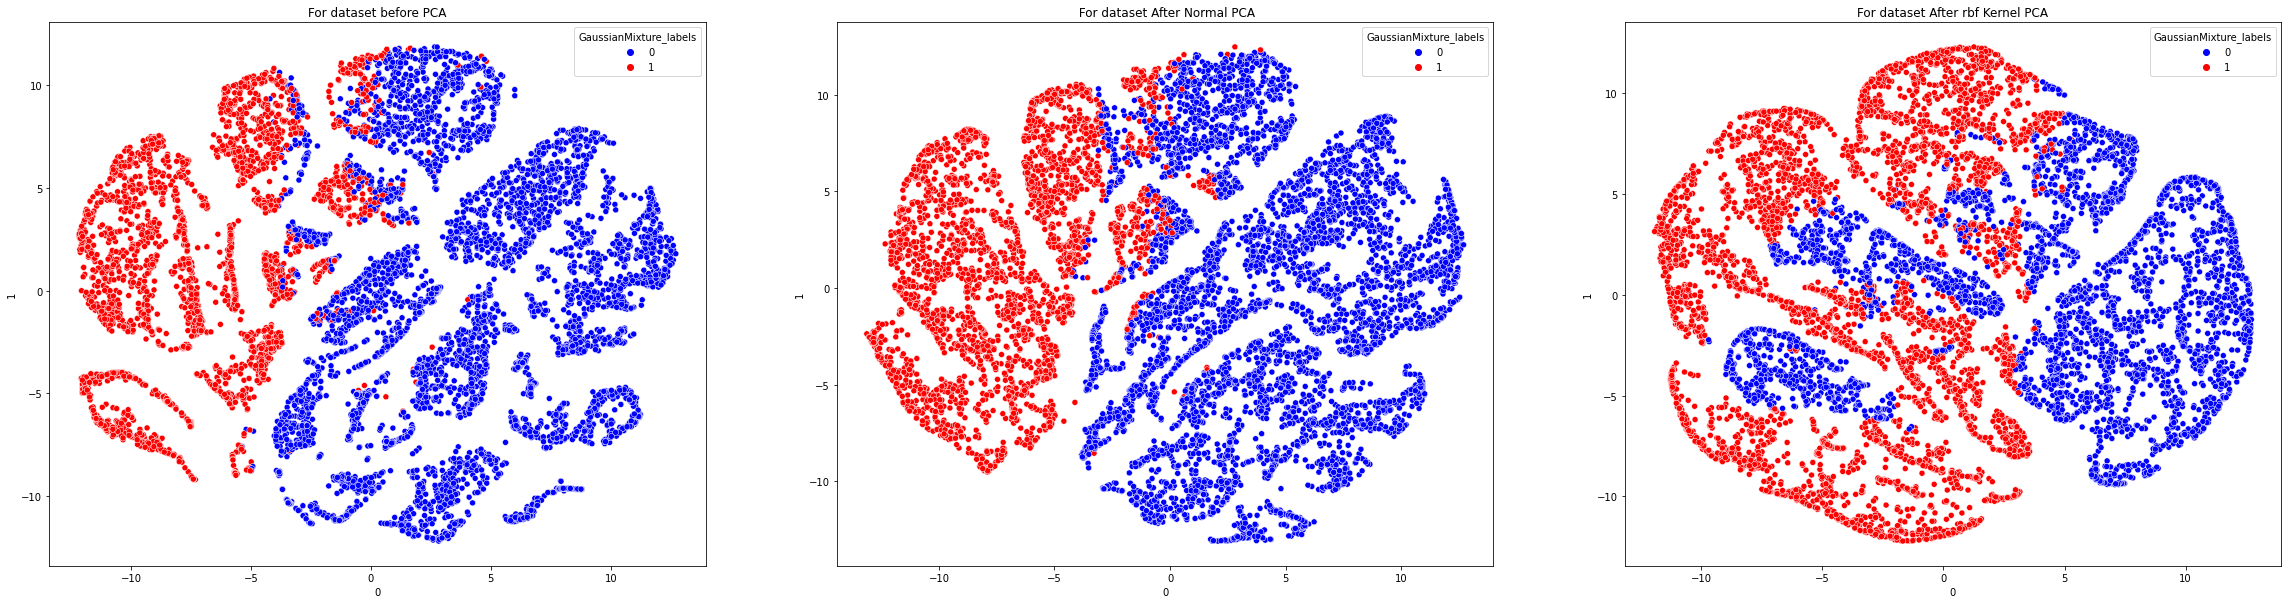

In [100]:
tsne_df['GaussianMixture_labels'] = tsne_em_df['GaussianMixture_labels']
tsne_pca_df['GaussianMixture_labels'] = tsne_em_pca_df['GaussianMixture_labels']
tsne_kernel_rbf_df['GaussianMixture_labels'] = tsne_em_kernel_df['GaussianMixture_labels']

fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],hue=tsne_df['GaussianMixture_labels'],ax=axs[0],palette=['blue', 'red'],legend='full').set(title='For dataset before PCA')
sns.scatterplot(x=tsne_pca_df[0], y=tsne_pca_df[1],hue=tsne_pca_df['GaussianMixture_labels'],ax=axs[1],palette=['blue', 'red'],legend='full').set(title=' For dataset After Normal PCA')
sns.scatterplot(x=tsne_kernel_rbf_df[0], y=tsne_kernel_rbf_df[1],hue=tsne_kernel_rbf_df['GaussianMixture_labels'],ax=axs[2],palette=['blue', 'red'],legend='full').set(title='For dataset After rbf Kernel PCA')


4. DBSCAN Algorithm

>>4.1. Using dataset before PCA

In [123]:
dbscan_model = DBSCAN(eps=4.4, min_samples=22).fit(credit_card_scaled_df)
tsne_dbscan_df = pd.DataFrame(credit_card_scaled_df,index=credit_card_scaled_df.index)
tsne_dbscan_df['DBSCAN_labels'] = dbscan_model.labels_
print('DBSCAN silhouette_score ', metrics.silhouette_score(credit_card_scaled_df, tsne_dbscan_df['DBSCAN_labels'], metric='euclidean'))
print('DBSCAN calinski_harabasz_score ', metrics.calinski_harabasz_score(credit_card_scaled_df, tsne_dbscan_df['DBSCAN_labels']))
print('DBSCAN davies_bouldin_score ', metrics.davies_bouldin_score(credit_card_scaled_df, tsne_dbscan_df['DBSCAN_labels']))

DBSCAN silhouette_score  0.27833073216511217
DBSCAN calinski_harabasz_score  2.762596949198808
DBSCAN davies_bouldin_score  0.5908498223002964


>>4.2. Using dataset After Normal PCA

In [142]:
dbscan_pca_model = DBSCAN(eps=3, min_samples=22).fit(normal_pca_df)
tsne_dbscan_pca_df = pd.DataFrame(normal_pca_df,index=normal_pca_df.index)
tsne_dbscan_pca_df['DBSCAN_labels'] = dbscan_pca_model.labels_
print('DBSCAN silhouette_score ', metrics.silhouette_score(normal_pca_df, tsne_dbscan_pca_df['DBSCAN_labels'], metric='euclidean'))
print('DBSCAN calinski_harabasz_score ', metrics.calinski_harabasz_score(normal_pca_df, tsne_dbscan_pca_df['DBSCAN_labels']))
print('DBSCAN davies_bouldin_score ', metrics.davies_bouldin_score(normal_pca_df, tsne_dbscan_pca_df['DBSCAN_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DBSCAN silhouette_score  -0.07764560226716585
DBSCAN calinski_harabasz_score  14.0322146949539
DBSCAN davies_bouldin_score  2.0423187973866557


>>4.3. Using dataset After Kernel rbf PCA

In [109]:
dbscan_kernel_model = DBSCAN(eps=4, min_samples=22).fit(kernel_rbf_pca_df)
tsne_dbscan_kernel_df = pd.DataFrame(kernel_rbf_pca_df,index=kernel_rbf_pca_df.index)
tsne_dbscan_kernel_df['DBSCAN_labels'] = dbscan_kernel_model.labels_
print('DBSCAN silhouette_score ', metrics.silhouette_score(kernel_rbf_pca_df, tsne_dbscan_kernel_df['DBSCAN_labels'], metric='euclidean'))
print('DBSCAN calinski_harabasz_score ', metrics.calinski_harabasz_score(kernel_rbf_pca_df, tsne_dbscan_kernel_df['DBSCAN_labels']))
print('DBSCAN davies_bouldin_score ', metrics.davies_bouldin_score(kernel_rbf_pca_df, tsne_dbscan_kernel_df['DBSCAN_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DBSCAN silhouette_score  0.44992417799285633
DBSCAN calinski_harabasz_score  6233.800302762345
DBSCAN davies_bouldin_score  0.5148450538265507


>> 4.4. T-SNE For DBSCAN Algorithm

[Text(0.5, 1.0, 'For dataset After rbf Kernel PCA')]

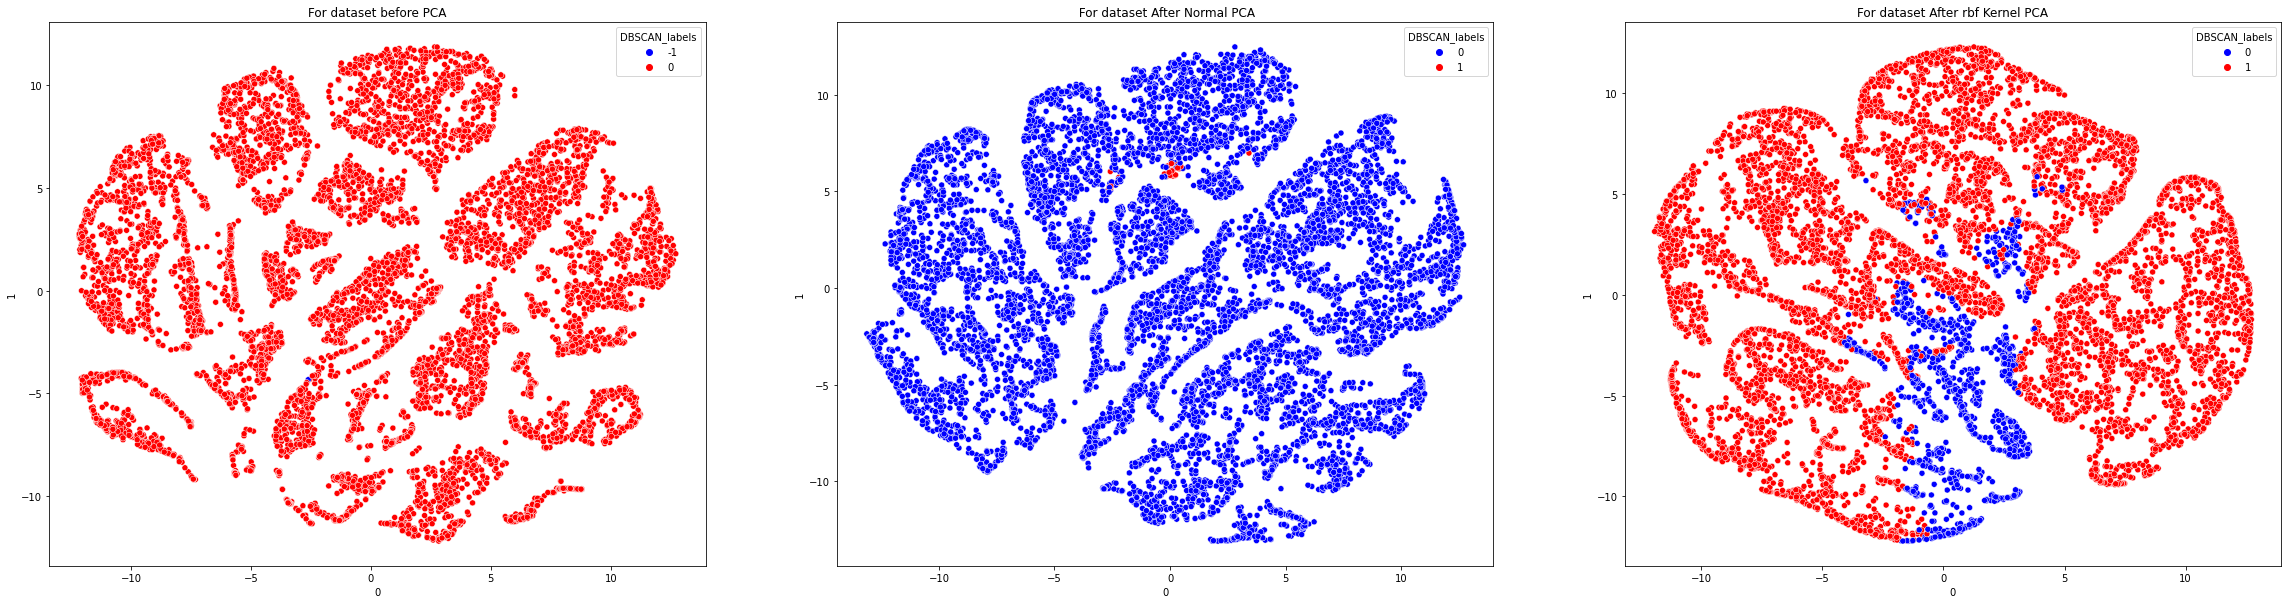

In [144]:
tsne_df['DBSCAN_labels'] = tsne_dbscan_df['DBSCAN_labels']
tsne_pca_df['DBSCAN_labels'] = tsne_dbscan_pca_df['DBSCAN_labels']
tsne_kernel_rbf_df['DBSCAN_labels'] = tsne_dbscan_kernel_df['DBSCAN_labels']

fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],hue=tsne_df['DBSCAN_labels'],ax=axs[0],palette=['blue', 'red'],legend='full').set(title='For dataset before PCA')
sns.scatterplot(x=tsne_pca_df[0], y=tsne_pca_df[1],hue=tsne_pca_df['DBSCAN_labels'],palette=['blue', 'red'],ax=axs[1],legend='full').set(title=' For dataset After Normal PCA')
sns.scatterplot(x=tsne_kernel_rbf_df[0], y=tsne_kernel_rbf_df[1],hue=tsne_kernel_rbf_df['DBSCAN_labels'],palette=['blue', 'red'],ax=axs[2],legend='full').set(title='For dataset After rbf Kernel PCA')


5. IsolationForest Algorithm

>>5.1. Using dataset before PCA

In [152]:
iForest_model = IsolationForest(n_estimators=20, contamination=0.1, verbose=5).fit(credit_card_scaled_df)
tsne_iForest_df = pd.DataFrame(credit_card_scaled_df,index=credit_card_scaled_df.index)
tsne_iForest_df['IForest_labels'] = iForest_model.predict(credit_card_scaled_df)
print('IsolationForest silhouette_score ', metrics.silhouette_score(credit_card_scaled_df, tsne_iForest_df['IForest_labels'], metric='euclidean'))
print('IsolationForest calinski_harabasz_score ', metrics.calinski_harabasz_score(credit_card_scaled_df, tsne_iForest_df['IForest_labels']))
print('IsolationForest davies_bouldin_score ', metrics.davies_bouldin_score(credit_card_scaled_df, tsne_iForest_df['IForest_labels']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

>>5.2. Using dataset After Normal PCA

In [153]:
iForest_pca_model = IsolationForest(n_estimators=20, contamination=0.1, verbose=5).fit(normal_pca_df)
tsne_iForest_pca_df = pd.DataFrame(normal_pca_df,index=normal_pca_df.index)
tsne_iForest_pca_df['IForest_labels'] = iForest_pca_model.predict(normal_pca_df)
print('IsolationForest silhouette_score ', metrics.silhouette_score(normal_pca_df, tsne_iForest_pca_df['IForest_labels'], metric='euclidean'))
print('IsolationForest calinski_harabasz_score ', metrics.calinski_harabasz_score(normal_pca_df, tsne_iForest_pca_df['IForest_labels']))
print('IsolationForest davies_bouldin_score ', metrics.davies_bouldin_score(normal_pca_df, tsne_iForest_pca_df['IForest_labels']))

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


IsolationForest silhouette_score  0.1865693003304748
IsolationForest calinski_harabasz_score  530.9670663016697
IsolationForest davies_bouldin_score  2.4998574764228785


>>5.3. Using dataset After Kernel rbf PCA

In [154]:
iForest_kernel_model = IsolationForest(n_estimators=20, contamination=0.1, verbose=5).fit(kernel_rbf_pca_df)
tsne_iForest_kernel_df = pd.DataFrame(kernel_rbf_pca_df,index=kernel_rbf_pca_df.index)
tsne_iForest_kernel_df['IForest_labels'] = iForest_kernel_model.predict(kernel_rbf_pca_df)
print('IsolationForest silhouette_score ', metrics.silhouette_score(kernel_rbf_pca_df, tsne_iForest_kernel_df['IForest_labels'], metric='euclidean'))
print('IsolationForest calinski_harabasz_score ', metrics.calinski_harabasz_score(kernel_rbf_pca_df, tsne_iForest_kernel_df['IForest_labels']))
print('IsolationForest davies_bouldin_score ', metrics.davies_bouldin_score(kernel_rbf_pca_df, tsne_iForest_kernel_df['IForest_labels']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


IsolationForest silhouette_score  0.26741232772377865
IsolationForest calinski_harabasz_score  1116.3419779776207
IsolationForest davies_bouldin_score  1.3327968482884245


>> 5.4. T-SNE For Hierarchical Clustering

[Text(0.5, 1.0, 'For dataset After rbf Kernel PCA')]

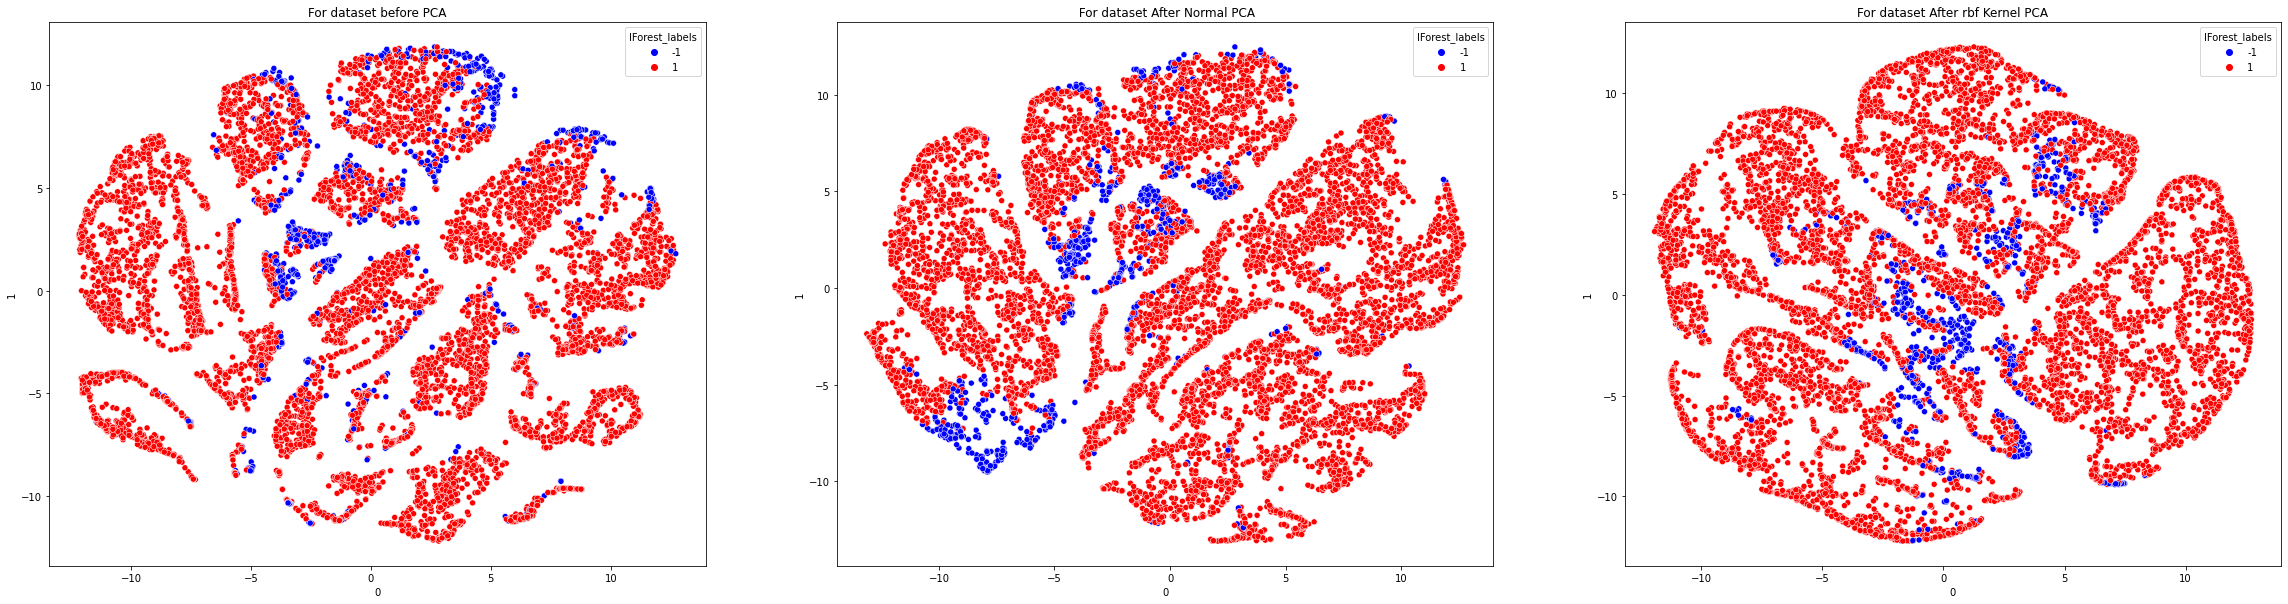

In [155]:
tsne_df['IForest_labels'] = tsne_iForest_df['IForest_labels']
tsne_pca_df['IForest_labels'] = tsne_iForest_pca_df['IForest_labels']
tsne_kernel_rbf_df['IForest_labels'] = tsne_iForest_kernel_df['IForest_labels']

fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],hue=tsne_df['IForest_labels'],ax=axs[0],palette=['blue', 'red'],legend='full').set(title='For dataset before PCA')
sns.scatterplot(x=tsne_pca_df[0], y=tsne_pca_df[1],hue=tsne_pca_df['IForest_labels'],palette=['blue', 'red'],ax=axs[1],legend='full').set(title=' For dataset After Normal PCA')
sns.scatterplot(x=tsne_kernel_rbf_df[0], y=tsne_kernel_rbf_df[1],hue=tsne_kernel_rbf_df['IForest_labels'],palette=['blue', 'red'],ax=axs[2],legend='full').set(title='For dataset After rbf Kernel PCA')


---
### **Conclusion**
1. ***DBSCAN Algorithm:*** is popular because it can find non-linearly separable clusters, which can’t be done with KMeans and Gaussian Mixtures. It works well when clusters and dense enough, and are separated by low-density regions.

2. ***EM Algorithm:*** is a general purpose algorithm for solving maximum likelihood estimation problems in a wide variety of situations best described as incomplete data problems.

3. ***IsolationForest Algorithm:*** that is especially useful at detecting outliers in high dimensional datasets.
---